# Seattle Crime #

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

### Let's start off by looking at our data ###

In [2]:
df = pd.read_csv("SPD_Crime_Data.csv")
df.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036236 entries, 0 to 1036235
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Report Number           1036236 non-null  object 
 1   Offense ID              1036236 non-null  int64  
 2   Offense Start DateTime  1034989 non-null  object 
 3   Offense End DateTime    583385 non-null   object 
 4   Report DateTime         1036236 non-null  object 
 5   Group A B               1036236 non-null  object 
 6   Crime Against Category  1036236 non-null  object 
 7   Offense Parent Group    1036236 non-null  object 
 8   Offense                 1036236 non-null  object 
 9   Offense Code            1036236 non-null  object 
 10  Precinct                1036232 non-null  object 
 11  Sector                  1036234 non-null  object 
 12  Beat                    1036234 non-null  object 
 13  MCPP                    1036236 non-null  object 
 14  10

**Let's check for null values**

In [4]:
df.isnull().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime      1247
Offense End DateTime      452851
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       4
Sector                         2
Beat                           2
MCPP                           0
100 Block Address          44049
Longitude                      0
Latitude                       0
dtype: int64

**Let's check for duplicate values**

In [5]:
df.drop_duplicates(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036236 entries, 0 to 1036235
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Report Number           1036236 non-null  object 
 1   Offense ID              1036236 non-null  int64  
 2   Offense Start DateTime  1034989 non-null  object 
 3   Offense End DateTime    583385 non-null   object 
 4   Report DateTime         1036236 non-null  object 
 5   Group A B               1036236 non-null  object 
 6   Crime Against Category  1036236 non-null  object 
 7   Offense Parent Group    1036236 non-null  object 
 8   Offense                 1036236 non-null  object 
 9   Offense Code            1036236 non-null  object 
 10  Precinct                1036232 non-null  object 
 11  Sector                  1036234 non-null  object 
 12  Beat                    1036234 non-null  object 
 13  MCPP                    1036236 non-null  object 
 14  10

## Preprocessing Our Data ##

### 1) Null Values ###

In [6]:
df.isnull().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime      1247
Offense End DateTime      452851
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       4
Sector                         2
Beat                           2
MCPP                           0
100 Block Address          44049
Longitude                      0
Latitude                       0
dtype: int64

So we can see that we have null values in our "Offense Start DateTime", "Offense End DateTime", "Precint", "Sector", "Beat", and "100 Block Address" variables. Let's take a closer look at some of the variables, and decide whether we want to eliminate the column entirely, or just eliminate the null values.

**Offense Start DateTime**

"Offense Start DateTime" is described as "Start date and time the offense(s) occurred". We are interested in seeing when the crime started, so we'll simply eliminate the null values. 

In [7]:
df = df.dropna(subset = ["Offense Start DateTime"])

Let's check the null values for "Offense Start DateTime" again to make sure we eliminated them

In [8]:
df.isnull().sum()

Report Number                  0
Offense ID                     0
Offense Start DateTime         0
Offense End DateTime      451752
Report DateTime                0
Group A B                      0
Crime Against Category         0
Offense Parent Group           0
Offense                        0
Offense Code                   0
Precinct                       4
Sector                         2
Beat                           2
MCPP                           0
100 Block Address          43857
Longitude                      0
Latitude                       0
dtype: int64

**Offense End DateTime**

The "Offense End DateTime" variable is described as the "end date and time the offense(s) occurred..". We are not interested in when the crime ended, so we'll eliminate the column entirely. 

In [9]:
df =df.drop(["Offense End DateTime"], axis = 1)
df

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036231,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
1036232,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
1036233,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
1036234,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


**Precint, Sector and Beat**

Seattle has 5 precincts, or police station areas. They are: North, East, South, West and Southwest. Then, there are smaller geographical areas within the precints called sectors. Finally, each sector is divided into 3 smaller sections called beats, which individual patrol officers are assigned responsibility for. We'll eliminate the precinct column, to narrow down the location of crimes a little more. We'll keep the sector and beat column, but eliminate the null values.

In [10]:
#Dropping Precinct column
df =df.drop(["Precinct"], axis = 1)
df

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036231,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702
1036232,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251
1036233,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894
1036234,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909


In [11]:
#Dropping null values in the sector and beat column
df = df.dropna(subset = ["Sector", "Beat"])

Let's check the null values again

In [12]:
df.isnull().sum()

Report Number                 0
Offense ID                    0
Offense Start DateTime        0
Report DateTime               0
Group A B                     0
Crime Against Category        0
Offense Parent Group          0
Offense                       0
Offense Code                  0
Sector                        0
Beat                          0
MCPP                          0
100 Block Address         43857
Longitude                     0
Latitude                      0
dtype: int64

**100 Block Address**

Lastly, we have the "100 Block Address" column. Since the information in this column is censored and doesn't give us very accurate locations, we'll eliminate the entire column.

In [13]:
df =df.drop(["100 Block Address"], axis = 1)
df

,Report Number,Offense ID,Offense Start DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Sector,Beat,MCPP,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,Q,Q1,MAGNOLIA,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,J,J3,ROOSEVELT/RAVENNA,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,U,U3,ROOSEVELT/RAVENNA,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,Q,Q1,MAGNOLIA,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,B,B2,BALLARD SOUTH,-122.366195,47.662193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036231,2013-247888,7687554356,07/13/2013 01:00:00 AM,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,F,F1,PIGEON POINT,-122.359028,47.565702
1036232,2013-227022,7682354808,06/26/2013 11:00:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,Q,Q3,QUEEN ANNE,-122.355386,47.626251
1036233,2012-045494,7672915592,02/14/2012 03:04:00 PM,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,U,U1,ROOSEVELT/RAVENNA,-122.317464,47.681894
1036234,2010-328592,7692227482,09/19/2010 04:59:00 PM,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,M,M3,DOWNTOWN COMMERCIAL,-122.335018,47.610909


Let's take another look at our null values

In [14]:
df.isnull().sum()

Report Number             0
Offense ID                0
Offense Start DateTime    0
Report DateTime           0
Group A B                 0
Crime Against Category    0
Offense Parent Group      0
Offense                   0
Offense Code              0
Sector                    0
Beat                      0
MCPP                      0
Longitude                 0
Latitude                  0
dtype: int64

We can now move onto cleaning other parts of our data

### 2) Eliminating Other Variables ###

We can eliminate some of the following variables: 

* Report Number, since that won't help us with future predictions
* Offense ID, a unique identifier that also won't help with future predictions
* Report DateTime, since the time a crime is reported can differ from when it actually started
* Group A B, since no additional information is given on what the different groups represent 
* Offense Parent Group, since we have a separate column for what the actual offense was
* Offense Code, since we already have the title of the offense via our Offense variable
* Longitude, since the actual longitude is censored to within 100 blocks
* Latitude, since latitude is also censored to within 100 blocks

In [15]:
#Eliminating above mentioned variables
df = df.drop(columns = ["Report Number", "Offense ID", "Report DateTime", "Group A B", "Offense Parent Group", "Offense Code", "Longitude", "Latitude"])
df

,Offense Start DateTime,Crime Against Category,Offense,Sector,Beat,MCPP
0,02/05/2020 10:10:00 AM,SOCIETY,Drug/Narcotic Violations,Q,Q1,MAGNOLIA
1,02/03/2020 08:00:00 AM,PROPERTY,Theft of Motor Vehicle Parts or Accessories,J,J3,ROOSEVELT/RAVENNA
2,02/02/2020 08:30:00 PM,PROPERTY,Robbery,U,U3,ROOSEVELT/RAVENNA
3,02/05/2020 01:17:00 AM,PROPERTY,Destruction/Damage/Vandalism of Property,Q,Q1,MAGNOLIA
4,02/05/2020 12:51:21 AM,SOCIETY,Driving Under the Influence,B,B2,BALLARD SOUTH
...,...,...,...,...,...,...
1036231,07/13/2013 01:00:00 AM,PROPERTY,Motor Vehicle Theft,F,F1,PIGEON POINT
1036232,06/26/2013 11:00:00 AM,PROPERTY,Motor Vehicle Theft,Q,Q3,QUEEN ANNE
1036233,02/14/2012 03:04:00 PM,PROPERTY,Shoplifting,U,U1,ROOSEVELT/RAVENNA
1036234,09/19/2010 04:59:00 PM,PROPERTY,Shoplifting,M,M3,DOWNTOWN COMMERCIAL


### 3) Data Types ###

We need to make sure our data is in appropiate format, to use for our models. Let's take a look at the different types of data, and see if we can convert into usable formats.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034987 entries, 0 to 1036235
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Offense Start DateTime  1034987 non-null  object
 1   Crime Against Category  1034987 non-null  object
 2   Offense                 1034987 non-null  object
 3   Sector                  1034987 non-null  object
 4   Beat                    1034987 non-null  object
 5   MCPP                    1034987 non-null  object
dtypes: object(6)
memory usage: 55.3+ MB


**Offense Start Date Time**

Let's start by converting our "Offense Start Date Time" into a datetime type.

In [17]:
df["Offense Start DateTime"] = df["Offense Start DateTime"].astype('datetime64[ns]')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034987 entries, 0 to 1036235
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Offense Start DateTime  1034987 non-null  datetime64[ns]
 1   Crime Against Category  1034987 non-null  object        
 2   Offense                 1034987 non-null  object        
 3   Sector                  1034987 non-null  object        
 4   Beat                    1034987 non-null  object        
 5   MCPP                    1034987 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 55.3+ MB


Let's split our datetime column into separate columns for day and time that the crime occured.

In [19]:
df['Time'] = pd.to_datetime(df['Offense Start DateTime']).dt.time
df['Day'] = pd.to_datetime(df['Offense Start DateTime']).dt.weekday

In [20]:
df

,Offense Start DateTime,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day
0,2020-02-05 10:10:00,SOCIETY,Drug/Narcotic Violations,Q,Q1,MAGNOLIA,10:10:00,2
1,2020-02-03 08:00:00,PROPERTY,Theft of Motor Vehicle Parts or Accessories,J,J3,ROOSEVELT/RAVENNA,08:00:00,0
2,2020-02-02 20:30:00,PROPERTY,Robbery,U,U3,ROOSEVELT/RAVENNA,20:30:00,6
3,2020-02-05 01:17:00,PROPERTY,Destruction/Damage/Vandalism of Property,Q,Q1,MAGNOLIA,01:17:00,2
4,2020-02-05 00:51:21,SOCIETY,Driving Under the Influence,B,B2,BALLARD SOUTH,00:51:21,2
...,...,...,...,...,...,...,...,...
1036231,2013-07-13 01:00:00,PROPERTY,Motor Vehicle Theft,F,F1,PIGEON POINT,01:00:00,5
1036232,2013-06-26 11:00:00,PROPERTY,Motor Vehicle Theft,Q,Q3,QUEEN ANNE,11:00:00,2
1036233,2012-02-14 15:04:00,PROPERTY,Shoplifting,U,U1,ROOSEVELT/RAVENNA,15:04:00,1
1036234,2010-09-19 16:59:00,PROPERTY,Shoplifting,M,M3,DOWNTOWN COMMERCIAL,16:59:00,6


Let's remove the Offense Start DateTime column, since we split up our data

In [21]:
df = df.drop(["Offense Start DateTime"], axis = 1)

In [22]:
df

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day
0,SOCIETY,Drug/Narcotic Violations,Q,Q1,MAGNOLIA,10:10:00,2
1,PROPERTY,Theft of Motor Vehicle Parts or Accessories,J,J3,ROOSEVELT/RAVENNA,08:00:00,0
2,PROPERTY,Robbery,U,U3,ROOSEVELT/RAVENNA,20:30:00,6
3,PROPERTY,Destruction/Damage/Vandalism of Property,Q,Q1,MAGNOLIA,01:17:00,2
4,SOCIETY,Driving Under the Influence,B,B2,BALLARD SOUTH,00:51:21,2
...,...,...,...,...,...,...,...
1036231,PROPERTY,Motor Vehicle Theft,F,F1,PIGEON POINT,01:00:00,5
1036232,PROPERTY,Motor Vehicle Theft,Q,Q3,QUEEN ANNE,11:00:00,2
1036233,PROPERTY,Shoplifting,U,U1,ROOSEVELT/RAVENNA,15:04:00,1
1036234,PROPERTY,Shoplifting,M,M3,DOWNTOWN COMMERCIAL,16:59:00,6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034987 entries, 0 to 1036235
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Crime Against Category  1034987 non-null  object
 1   Offense                 1034987 non-null  object
 2   Sector                  1034987 non-null  object
 3   Beat                    1034987 non-null  object
 4   MCPP                    1034987 non-null  object
 5   Time                    1034987 non-null  object
 6   Day                     1034987 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 63.2+ MB


**Crime Against Category**

Let's look at the unique values of our Crime Against Category variable, and then convert those values into numerical categories.

In [24]:
df["Crime Against Category"].value_counts()

PROPERTY       771419
PERSON         157102
SOCIETY        106433
NOT_A_CRIME        33
Name: Crime Against Category, dtype: int64

In [25]:
#Converting into categories
df["Crime Against Category"] = df["Crime Against Category"].astype("category").cat.codes

In [26]:
df["Crime Against Category"].unique()

array([3, 2, 1, 0], dtype=int8)

**Sector, Beat, and MCPP**

Let's do the same thing with our Sector, Beat, and MCPP variables

In [27]:
#Converting values into categories
df["Sector"] = df["Sector"].astype("category").cat.codes
df["Beat"] = df["Beat"].astype("category").cat.codes
df["MCPP"] = df["MCPP"].astype("category").cat.codes

Let's see what our data looks like so far

In [28]:
df

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day
0,3,Drug/Narcotic Violations,18,39,33,10:10:00,2
1,2,Theft of Motor Vehicle Parts or Accessories,11,22,50,08:00:00,0
2,2,Robbery,22,50,50,20:30:00,6
3,2,Destruction/Damage/Vandalism of Property,18,39,33,01:17:00,2
4,3,Driving Under the Influence,5,3,4,00:51:21,2
...,...,...,...,...,...,...,...
1036231,2,Motor Vehicle Theft,9,14,45,01:00:00,5
1036232,2,Motor Vehicle Theft,18,41,47,11:00:00,2
1036233,2,Shoplifting,22,48,50,15:04:00,1
1036234,2,Shoplifting,14,31,16,16:59:00,6


**Time and Day**

Lastly, let's do the exact same thing to our Time and Day variables

In [29]:
#Converting values into categories
df["Time"] = df["Time"].astype("category").cat.codes
df["Day"] = df["Day"].astype("category").cat.codes

Let's take a look at our updated dataset

In [30]:
df

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day
0,3,Drug/Narcotic Violations,18,39,33,1599,2
1,2,Theft of Motor Vehicle Parts or Accessories,11,22,50,1285,0
2,2,Robbery,22,50,50,3344,6
3,2,Destruction/Damage/Vandalism of Property,18,39,33,252,2
4,3,Driving Under the Influence,5,3,4,164,2
...,...,...,...,...,...,...,...
1036231,2,Motor Vehicle Theft,9,14,45,193,5
1036232,2,Motor Vehicle Theft,18,41,47,1714,2
1036233,2,Shoplifting,22,48,50,2368,1
1036234,2,Shoplifting,14,31,16,2691,6


We can now start trying to create our initial model

In [31]:
df["Offense"].value_counts()

Theft From Motor Vehicle                       167852
Burglary/Breaking & Entering                   116326
Destruction/Damage/Vandalism of Property        95940
All Other Larceny                               88009
Simple Assault                                  79013
Motor Vehicle Theft                             65935
Shoplifting                                     63871
Intimidation                                    34914
Aggravated Assault                              34715
Theft of Motor Vehicle Parts or Accessories     34193
Trespass of Real Property                       32156
Theft From Building                             29011
Robbery                                         24079
Drug/Narcotic Violations                        23768
Credit Card/Automated Teller Machine Fraud      19294
Driving Under the Influence                     18404
Impersonation                                   12729
Identity Theft                                  12150
False Pretenses/Swindle/Conf

In [32]:
#df = df.drop(df[(df["Offense"] == 'Gambling Equipment Violation') & (df["Offense"] == 'Human Trafficking, Involuntary Servitude') & (df["Offense"] == "Operating/Promoting/Assisting Gambling")].index, inplace = True)
df = df[df["Offense"].str.contains("Gambling Equipment Violation") == False]
df = df[df["Offense"].str.contains("Human Trafficking, Involuntary Servitude") == False]
df = df[df["Offense"].str.contains("Operating/Promoting/Assisting Gambling") == False]                             

In [33]:
df["Offense"].value_counts()

Theft From Motor Vehicle                       167852
Burglary/Breaking & Entering                   116326
Destruction/Damage/Vandalism of Property        95940
All Other Larceny                               88009
Simple Assault                                  79013
Motor Vehicle Theft                             65935
Shoplifting                                     63871
Intimidation                                    34914
Aggravated Assault                              34715
Theft of Motor Vehicle Parts or Accessories     34193
Trespass of Real Property                       32156
Theft From Building                             29011
Robbery                                         24079
Drug/Narcotic Violations                        23768
Credit Card/Automated Teller Machine Fraud      19294
Driving Under the Influence                     18404
Impersonation                                   12729
Identity Theft                                  12150
False Pretenses/Swindle/Conf

In [34]:
df = df[~df['Offense'].isin(df['Offense'].value_counts().lt(15000).pipe(lambda s: s[s].index))]

In [35]:
df["Offense"].value_counts()

Theft From Motor Vehicle                       167852
Burglary/Breaking & Entering                   116326
Destruction/Damage/Vandalism of Property        95940
All Other Larceny                               88009
Simple Assault                                  79013
Motor Vehicle Theft                             65935
Shoplifting                                     63871
Intimidation                                    34914
Aggravated Assault                              34715
Theft of Motor Vehicle Parts or Accessories     34193
Trespass of Real Property                       32156
Theft From Building                             29011
Robbery                                         24079
Drug/Narcotic Violations                        23768
Credit Card/Automated Teller Machine Fraud      19294
Driving Under the Influence                     18404
Name: Offense, dtype: int64

In [36]:
df

,Crime Against Category,Offense,Sector,Beat,MCPP,Time,Day
0,3,Drug/Narcotic Violations,18,39,33,1599,2
1,2,Theft of Motor Vehicle Parts or Accessories,11,22,50,1285,0
2,2,Robbery,22,50,50,3344,6
3,2,Destruction/Damage/Vandalism of Property,18,39,33,252,2
4,3,Driving Under the Influence,5,3,4,164,2
...,...,...,...,...,...,...,...
1036231,2,Motor Vehicle Theft,9,14,45,193,5
1036232,2,Motor Vehicle Theft,18,41,47,1714,2
1036233,2,Shoplifting,22,48,50,2368,1
1036234,2,Shoplifting,14,31,16,2691,6


## Initial Model ##

Let's start off by first identifying our target variable

In [37]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [39]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [40]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

#ros = RandomOverSampler(random_state=1)
#X_train, y_train = ros.fit_resample(X_train, y_train)

Now it's time to initialize our model

In [41]:
#Initializing our model
#InitialModel = LogisticRegression(multi_class='ovr', random_state= 1)

Now we'll fit our model

In [42]:
#InitialModel.fit(X_train, y_train)

In [43]:
#y_train_pred = InitialModel.predict(X_train)
#y_test_pred = InitialModel.predict(X_test)

In [44]:
#print(classification_report(y_train, y_train_pred))

In [45]:
#print(classification_report(y_test, y_test_pred))

## Random Forest Model ##

In [46]:
rf = RandomForestClassifier(random_state = 1,  max_depth = 5)

rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [47]:
print(classification_report(y_train, rf_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.42      0.32      0.36    125735
                          All Other Larceny       0.13      0.07      0.09    125735
               Burglary/Breaking & Entering       0.16      0.19      0.17    125735
 Credit Card/Automated Teller Machine Fraud       0.30      0.21      0.25    125735
   Destruction/Damage/Vandalism of Property       0.16      0.03      0.05    125735
                Driving Under the Influence       0.59      0.71      0.64    125735
                   Drug/Narcotic Violations       0.55      0.40      0.46    125735
                               Intimidation       0.41      0.67      0.51    125735
                        Motor Vehicle Theft       0.15      0.38      0.21    125735
                                    Robbery       0.22      0.16      0.19    125735
                                Shoplifting       0.24      0.46

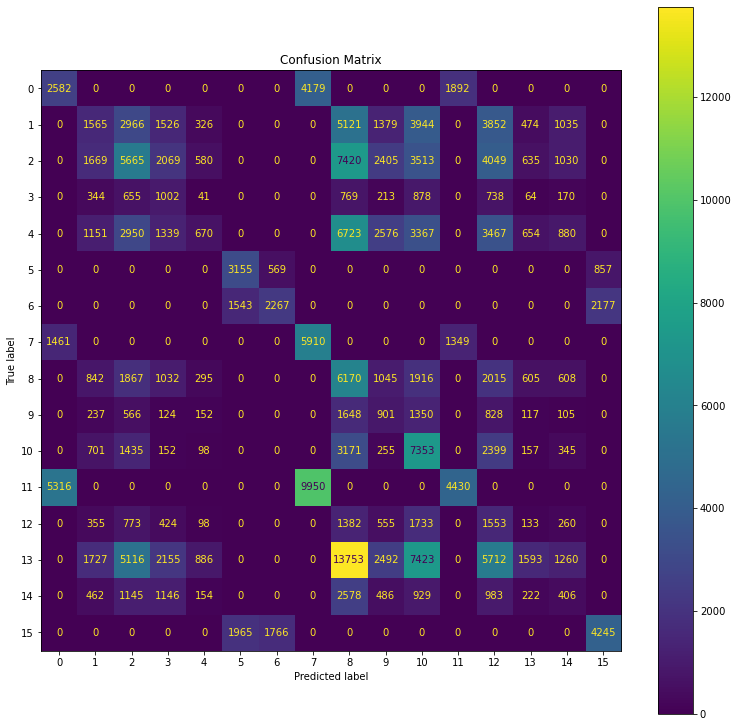

In [66]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

cm = confusion_matrix(y_test, rf_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");